<a href="https://colab.research.google.com/github/coolcat6969/CIS-114-projects/blob/main/Copy_of_Reineke_Aiden_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

For this part, I chose the book **“Alice’s Adventures in Wonderland”** by Lewis Carroll, obtained from [Project Gutenberg](https://www.gutenberg.org/ebooks/11).

This text contains 12 chapters, which satisfy the requirement of at least 5 narrative segments.  
Below, I will:
1. Load the text file into Python  
2. Convert all words to lowercase (case-insensitive)  
3. Remove punctuation  
4. Tokenize the text into individual words  
5. Store all words in a one-dimensional list


In [ ]:
import string

# Load the text file
with open("sample_data/alice_in_wonderland.txt", "r", encoding="utf-8") as file:
    text = file.read()

# Display first 500 characters for preview
print(text[:500])


CHAPTER I.
Down the Rabbit-Hole
Alice was beginning to get very tired of sitting by her sister on the bank, and of having nothing to do: once or twice she had peeped into the book her sister was reading, but it had no pictures or conversations in it, “and what is the use of a book,” thought Alice “without pictures or conversations?”

So she was considering in her own mind (as well as she could, for the hot day made her feel very sleepy and stupid), whether the pleasure of making a daisy-chain wo


Next, I will:
- Convert all text to lowercase.
- Remove punctuation marks using `string.punctuation`.
- Split the text into words using Python’s built-in `.split()` method.

In [ ]:
# Convert text to lowercase
text = text.lower()

# Remove punctuation
translator = str.maketrans("", "", string.punctuation)
clean_text = text.translate(translator)

# Tokenize (split by whitespace)
tokens = clean_text.split()

# Display results
print(f"Total number of words: {len(tokens)}")
print("First 20 tokens:", tokens[:20])


Total number of words: 26379
First 20 tokens: ['chapter', 'i', 'down', 'the', 'rabbithole', 'alice', 'was', 'beginning', 'to', 'get', 'very', 'tired', 'of', 'sitting', 'by', 'her', 'sister', 'on', 'the', 'bank']


The variable `tokens` is now a one-dimensional list containing all words from the book in order.  
Each word appears as it does sequentially in the story, all in lowercase and punctuation-free.


Using the token list from Part 1.a, I will now:
1. Count the occurrences of each unique word.
2. Preserve the order of *first appearance* in the text.
3. Store the data in a Pandas DataFrame with columns **Word** and **Count**.

In [ ]:
import pandas as pd

# Create a dictionary preserving first occurrence order
word_counts = {}
for word in tokens:
    if word not in word_counts:
        word_counts[word] = tokens.count(word)

# Create dataframe
df = pd.DataFrame(list(word_counts.items()), columns=["Word", "Count"])

# Display the first few rows
print(df.head(10))

# Save dataframe to a variable
word_freq_df = df


         Word  Count
0     chapter     12
1           i    265
2        down     97
3         the   1607
4  rabbithole      3
5       alice    383
6         was    351
7   beginning     11
8          to    710
9         get     43


Now I will:
1. Remove all English stop words provided in the list.
2. Sort the remaining words in descending order of frequency.


In [ ]:
# Stop words provided in the assignment
stop_words = ["a", "about", "above", "after", "again", "against", "all", "am",
              "an", "and", "any", "are", "as", "at", "be", "because", "been",
              "before", "being", "below", "between", "both", "but", "by",
              "could", "did", "do", "does", "doing", "down", "during", "each",
              "few", "for", "from", "further", "had", "has", "have", "having",
              "he", "her", "here", "hers", "herself", "him", "himself", "his",
              "how", "i", "if", "in", "into", "is", "it", "its", "itself",
              "let", "me", "more", "most", "my", "myself", "nor", "of", "on",
              "once", "only", "or", "other", "ought", "our", "ours", "ourselves",
              "out", "over", "own", "same", "she", "should", "so", "some", "such",
              "than", "that", "the", "their", "theirs", "them", "themselves",
              "then", "there", "these", "they", "this", "those", "through",
              "to", "too", "under", "until", "up", "very", "was", "we", "were",
              "what", "when", "where", "which", "while", "who", "whom", "why",
              "with", "would", "you", "your", "yours", "yourself", "yourselves"]

# Remove stop words
filtered_df = word_freq_df[~word_freq_df["Word"].isin(stop_words)]

# Sort in decreasing order of frequency
filtered_df = filtered_df.sort_values(by="Count", ascending=False)

# Display top 10 words
print(filtered_df.head(10))

# Save dataframe
clean_df = filtered_df


        Word  Count
234     said    457
5      alice    383
309   little    125
228       “i    123
151      not    121
188      one     90
142     went     83
147     like     78
44   thought     74
34        no     73


Here, I will:
1. Identify the top six most frequent words from Part 1.c.
2. Divide the text into chapters.
3. Count the occurrences of each top word in each chapter.
4. Plot bar graphs (ratios) showing their relative usage across chapters.


Top 6 words: ['said', 'alice', 'little', '“i', 'not', 'one']


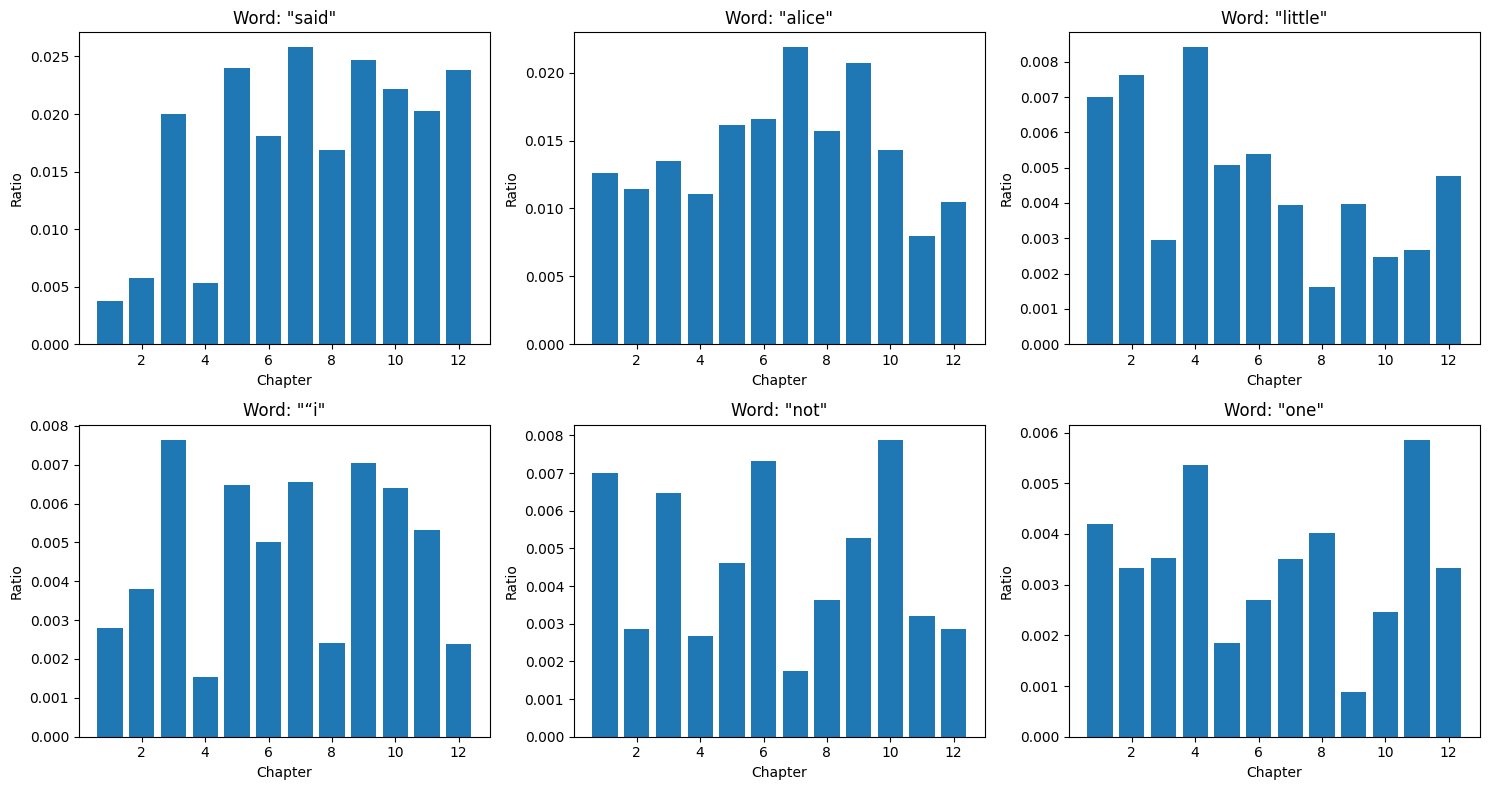

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Identify top 6 words
top_words = clean_df["Word"].head(6).tolist()
print("Top 6 words:", top_words)

# Split the text into chapters (assuming 'CHAPTER' marks divisions)
chapters = text.split("chapter")[1:]  # split and skip preface

# Prepare structure to hold counts
chapter_ratios = {word: [] for word in top_words}

# Count occurrences per chapter
for ch in chapters:
    ch_tokens = ch.lower().translate(str.maketrans("", "", string.punctuation)).split()
    total_words = len(ch_tokens)
    for word in top_words:
        ratio = ch_tokens.count(word) / total_words
        chapter_ratios[word].append(ratio)

# Plot bar charts
fig, axes = plt.subplots(2, 3, figsize=(15, 8))
axes = axes.flatten()

for i, word in enumerate(top_words):
    axes[i].bar(range(1, len(chapters) + 1), chapter_ratios[word])
    axes[i].set_title(f'Word: "{word}"')
    axes[i].set_xlabel("Chapter")
    axes[i].set_ylabel("Ratio")

plt.tight_layout()
plt.show()
